## 线性回归代码实现

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##### 定义一个加载数据的函数

In [4]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

##### 特征归一化
归一化有很多种方式，我们这里采取的方式是：对每一个特征，这列中的每个数据分别减去这列的均值，然后再除以这列的方差

In [5]:
def featureNormalize(X):
    mu = np.average(X,axis=0)
    sigma =np.std(X,axis=0,ddof=1)
    X = (X-mu)/sigma
    return X,mu,sigma

##### 计算损失函数
<img src="images/02.png" width="300" align="left"/>
<p>
<img src="images/03.png" width="300" align="left"/>

In [6]:
def computeCost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)

#### 梯度下降法求解
<img src="images/01.png" width="300" align="left"/>

In [7]:
def gradientDescent(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)#对原始数据加入一个全为1的列
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1))
        costs[num] = computeCost(X,y,theta)
    return theta,costs

In [8]:
##### 预测函数

In [9]:
def predict(X):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X, 0, values=c, axis=1)
    return np.dot(X,theta)

In [10]:
X_orgin,y = loaddata()
X,mu,sigma = featureNormalize(X_orgin)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 400
alpha = 0.01
theta,costs = gradientDescent(X,y,theta,iterations,alpha)

##### 画损失函数图

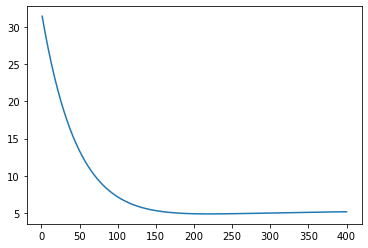

In [11]:
x_axis = np.linspace(1,iterations,iterations)
plt.plot(x_axis,costs[0:iterations])

##### 画数据散点图和求得的直线

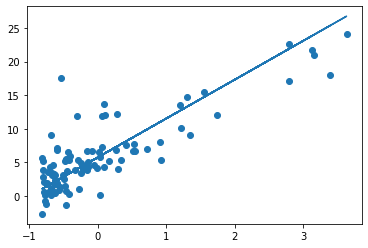

In [12]:
plt.scatter(X,y)
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)

##### 预测数据

In [13]:
print(predict([[5.5277]]))

[[1.79656055]]


## 常见的模型评价指标

##### 1、均方误差
<img src="images/04.png" width="200" align="left"/>

In [14]:
y_true = np.array([1,2,3,4,5])
y_pred = np.array([1.1,2.2,3.1,4.2,5])

In [15]:
def mse(y_true,y_pred):
    return np.sum(np.power(y_true-y_pred,2))/len(y_true)
mse(y_true,y_pred)

0.020000000000000035

##### 2、均方根误差
<img src="images/05.png" width="200" align="left"/>

In [16]:
def rmse(y_true,y_pred):
    return np.sqrt(np.sum(np.power(y_true-y_pred,2))/len(y_true))
rmse(y_true,y_pred)

0.14142135623730964

##### 3、平均绝对误差
<img src="images/06.png" width="200" align="left"/>

In [17]:
def mae(y_true,y_pred):
    return np.sum(np.abs(y_true-y_pred))/len(y_true)
mae(y_true,y_pred)

0.1200000000000001

### 对模型进行评价

In [18]:
y_pred = predict(X_orgin)
y_pred

array([[ 2.6678613 ],
       [ 1.79656055],
       [ 6.27110285],
       [ 4.00398546],
       [ 2.29339946],
       [ 6.06808858],
       [ 4.71191732],
       [ 6.36011795],
       [ 3.23052651],
       [ 1.08877829],
       [ 2.07033809],
       [14.71691552],
       [ 2.1051961 ],
       [ 6.10623791],
       [ 1.96561444],
       [ 1.57469602],
       [ 3.04980341],
       [ 1.20173022],
       [ 3.14584996],
       [ 4.10511858],
       [ 2.78604942],
       [23.8518098 ],
       [ 1.74030899],
       [ 2.99100856],
       [ 1.85221369],
       [21.86954073],
       [12.71818988],
       [ 9.91907635],
       [13.23881602],
       [26.74367856],
       [ 1.3846974 ],
       [ 3.38491909],
       [ 7.36262248],
       [ 2.34127313],
       [ 5.81106682],
       [ 5.39561315],
       [ 5.63872162],
       [ 1.91415024],
       [12.7301583 ],
       [ 3.03185079],
       [ 1.61583745],
       [ 3.82341197],
       [11.0426115 ],
       [ 2.16458937],
       [ 5.23299228],
       [ 4

In [19]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

In [20]:
print('mse',mse(y,y_pred))
print('rmse',rmse(y,y_pred))
print('mae',mae(y,y_pred))

mse 10.325851986459867
rmse 3.2133863736656174
mae 2.313857041154255
